# Data Preparation

## Libraries

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Import

In [94]:
from sklearn.datasets import fetch_openml

fmnist = fetch_openml(name='Fashion-MNIST')

# Create a DataFrame from the dataset
df = pd.concat([fmnist['data'], fmnist['target']], axis=1)

df.head(1)

c:\Users\james\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [96]:
df.shape

(70000, 785)

## Convert Class Numbers to Labels

In [114]:
class_labels = {
    0: "T-shirt / Top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Boot"
}

# Create a DataFrame from the dataset
df = pd.concat([fmnist['data'], fmnist['target']], axis=1)

# Convert the 'class' column to a regular column
df['class'] = df['class'].astype(int)

# Map the class labels to class names without getting NA values
df['class'] = df['class'].map(class_labels)

# Convert the 'class' column back to a categorical column
df['class'] = df['class'].astype('category')

df.head(1)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Boot


## Clothing Types

In [115]:
df['class'].value_counts()

class
Bag              7000
Boot             7000
Coat             7000
Dress            7000
Pullover         7000
Sandal           7000
Shirt            7000
Sneaker          7000
T-shirt / Top    7000
Trouser          7000
Name: count, dtype: int64

## Image Maker Function

In [121]:
import matplotlib.pyplot as plt

def image_maker(index, df, class_=None):
    if class_ is not None:
        # Filter the DataFrame based on the provided class value
        df = df[df['class'] == class_].reset_index(drop=True)
    
    # Check if the index is within the valid range of the filtered DataFrame
    if index < 0 or index >= len(df):
        print("Invalid index")
        return
    
    # Access the image data and corresponding label
    image = df.iloc[index, :-1].astype(float)
    label = df.iloc[index, -1]

    # Reshape the image from a flattened array to its original shape (28x28 pixels)
    image = image.values.reshape(28, 28)

    # Get the category name from the DataFrame based on the label
    category_name = df.iloc[index, -1]

    # Display the image with the category name as the title
    plt.imshow(image, cmap='gray')
    plt.title(category_name)
    plt.axis('off')
    plt.show()

In [228]:
df['class'].value_counts()

class
Bag              7000
Boot             7000
Coat             7000
Dress            7000
Pullover         7000
Sandal           7000
Shirt            7000
Sneaker          7000
T-shirt / Top    7000
Trouser          7000
Name: count, dtype: int64

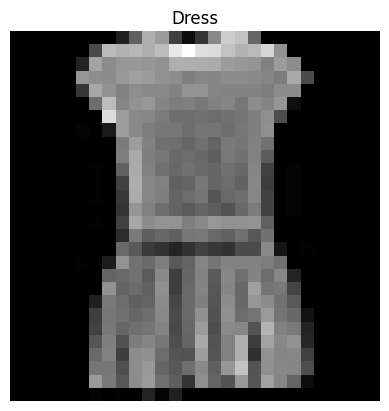

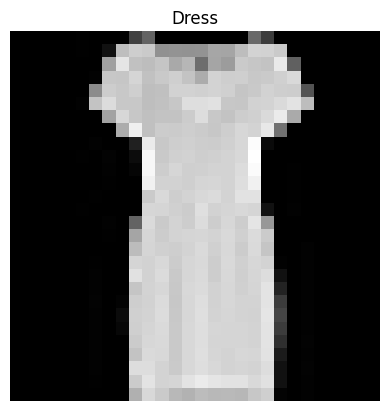

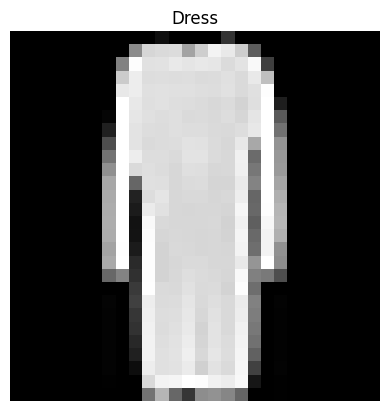

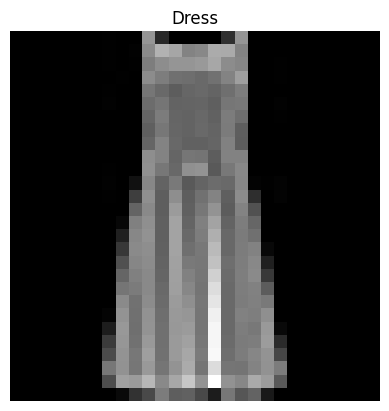

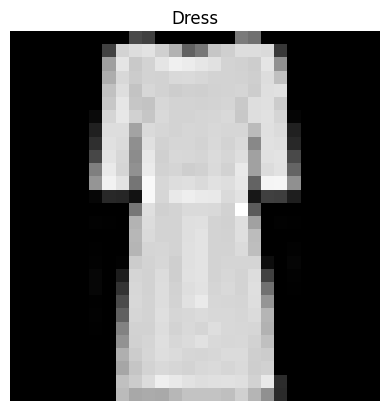

In [254]:
# Produce Image
for i in range(5):
    image_maker(i, df, class_='Dress')

# Model Building

## Train Test Split

In [150]:
X = df.copy()
y = X.pop('class')

### Mini Training Set
Because it's computationally Expensive

In [218]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=2500, test_size = 1000)

In [219]:
# Didn't stratify the data.
y_train.value_counts()

class
Shirt            266
Coat             258
Boot             257
T-shirt / Top    254
Dress            252
Sandal           251
Sneaker          251
Pullover         243
Bag              239
Trouser          229
Name: count, dtype: int64

In [220]:
y_test.value_counts()

class
Dress            118
Sandal           110
Coat             104
Trouser          104
Sneaker          103
Pullover         100
Bag               99
Shirt             95
T-shirt / Top     84
Boot              83
Name: count, dtype: int64

## Building the Pipeline

### Scaler

In [221]:
# To scale the pixel data from a 0-255 scale to a 0 to 1 scale.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

### ML Algorithms

In [222]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


classifiers = [RandomForestClassifier(n_jobs=-1), 
               LogisticRegression(n_jobs=-1),  
               MLPClassifier(max_iter=500), 
               SVC(),
               KNeighborsClassifier()]

### Grid Search

In [223]:
# Grid Search
# Building the Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

for classifier in classifiers:
    pipe = make_pipeline(scaler, classifier)
    grid = GridSearchCV(pipe, 
                        cv=5, 
                        scoring='accuracy', 
                        param_grid={},
                        verbose=3)
    grid.fit(X_train, y_train)
    score = grid.best_score_

    print(f"{classifier} ACCURACY: {score * 100}%\n")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..................................., score=0.806 total time=   0.9s
[CV 2/5] END ..................................., score=0.802 total time=   1.0s
[CV 3/5] END ..................................., score=0.862 total time=   0.8s
[CV 4/5] END ..................................., score=0.804 total time=   0.8s
[CV 5/5] END ..................................., score=0.822 total time=   0.8s
RandomForestClassifier(n_jobs=-1) ACCURACY: 81.92%

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..................................., score=0.800 total time=   1.6s
[CV 2/5] END ..................................., score=0.774 total time=   1.5s
[CV 3/5] END ..................................., score=0.822 total time=   1.6s
[CV 4/5] END ..................................., score=0.798 total time=   1.6s
[CV 5/5] END ..................................., score=0.836 total time=   1.6s
LogisticRegression(n

## Increasing Training Size

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=10000, test_size = 1000)

classifiers = [RandomForestClassifier(n_jobs=-1), 
               LogisticRegression(n_jobs=-1), 
               SVC(),
               KNeighborsClassifier()]

for classifier in classifiers:
    pipe = make_pipeline(scaler, classifier)
    grid = GridSearchCV(pipe, 
                        cv=5, 
                        scoring='accuracy', 
                        param_grid={},
                        verbose=3)
    grid.fit(X_train, y_train)
    score = grid.best_score_

    print(f"{classifier} ACCURACY: {score * 100}%\n")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..................................., score=0.863 total time=   5.8s
[CV 2/5] END ..................................., score=0.850 total time=   3.6s
[CV 3/5] END ..................................., score=0.854 total time=   3.6s
[CV 4/5] END ..................................., score=0.853 total time=   3.5s
[CV 5/5] END ..................................., score=0.845 total time=   3.5s
RandomForestClassifier(n_jobs=-1) ACCURACY: 85.28999999999999%

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..................................., score=0.839 total time=   3.3s
[CV 2/5] END ..................................., score=0.833 total time=   3.4s
[CV 3/5] END ..................................., score=0.836 total time=   3.5s
[CV 4/5] END ..................................., score=0.842 total time=   3.4s
[CV 5/5] END ..................................., score=0.835 total time=   3.4s
Logistic

KNN Seems the Fastest

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2)

classifiers = [KNeighborsClassifier()]

for classifier in classifiers:
    pipe = make_pipeline(scaler, classifier)
    grid = GridSearchCV(pipe, 
                        cv=5, 
                        scoring='accuracy', 
                        param_grid={},
                        verbose=3)
    grid.fit(X_train, y_train)
    score = grid.best_score_

    print(f"{classifier} ACCURACY: {score * 100}%\n")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..................................., score=0.852 total time=   8.5s
[CV 2/5] END ..................................., score=0.855 total time=   8.8s
[CV 3/5] END ..................................., score=0.856 total time=   8.4s
[CV 4/5] END ..................................., score=0.853 total time=   9.0s
[CV 5/5] END ..................................., score=0.849 total time=   8.8s
KNeighborsClassifier() ACCURACY: 85.30178571428571%



Parameter Tuning KNN

In [227]:
param_grid = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__p': [1, 2]
}

pipe = make_pipeline(scaler, KNeighborsClassifier())
grid = GridSearchCV(pipe, param_grid=param_grid, scoring='accuracy', cv=5, verbose=3)
grid.fit(X_train, y_train)

print("Best Score:", grid.best_score_)
print("Best Params:", grid.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END kneighborsclassifier__n_neighbors=3, kneighborsclassifier__p=1, kneighborsclassifier__weights=uniform;, score=0.858 total time= 1.6min
[CV 2/5] END kneighborsclassifier__n_neighbors=3, kneighborsclassifier__p=1, kneighborsclassifier__weights=uniform;, score=0.860 total time= 1.6min
[CV 3/5] END kneighborsclassifier__n_neighbors=3, kneighborsclassifier__p=1, kneighborsclassifier__weights=uniform;, score=0.861 total time= 1.7min
[CV 4/5] END kneighborsclassifier__n_neighbors=3, kneighborsclassifier__p=1, kneighborsclassifier__weights=uniform;, score=0.856 total time= 1.7min
[CV 5/5] END kneighborsclassifier__n_neighbors=3, kneighborsclassifier__p=1, kneighborsclassifier__weights=uniform;, score=0.854 total time= 1.6min
[CV 1/5] END kneighborsclassifier__n_neighbors=3, kneighborsclassifier__p=1, kneighborsclassifier__weights=distance;, score=0.860 total time= 1.6min
[CV 2/5] END kneighborsclassifier__n_neighbors=3, 

Best Score: 0.86075
Best Params: {'kneighborsclassifier__n_neighbors': 5, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'distance'}

### XGB Boost

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Define the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Fit the classifier to the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


### CNN

In [ ]:
pip install tensorflow

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Define the model architecture
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Preprocess the data (assuming X_train and y_train are your training data)
X_train = X_train.reshape(-1, 28, 28, 1)
X_train = X_train.astype('float32') / 255.0

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model (assuming X_test and y_test are your test data)
X_test = X_test.reshape(-1, 28, 28, 1)
X_test = X_test.astype('float32') / 255.0

loss, accuracy = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)


## Best Model

## Testing Data

In [ ]:
grid.best_estimator_.score(X_test, y_test)

In [ ]:
model = make_pipeline(preprocessor, SVC(C=2, probability=True))

## Refitting Data

In [ ]:
model.fit(X, y)

In [ ]:
model.score(X, y)

In [ ]:
from joblib import dump
dump(model, "churn_model.joblib")

# Confusion Matrix

## Show Errors and Probabilities